https://celulares.mercadolibre.com.mx/_Desde_51
https://celulares.mercadolibre.com.mx/_Desde_101
https://celulares.mercadolibre.com.mx/_Desde_151
https://celulares.mercadolibre.com.mx/_Desde_201
https://celulares.mercadolibre.com.mx/_Desde_251
https://celulares.mercadolibre.com.mx/_Desde_301
https://celulares.mercadolibre.com.mx/_Desde_351
https://celulares.mercadolibre.com.mx/_Desde_401
https://celulares.mercadolibre.com.mx/_Desde_451
539 celulares recopilados


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4813BCCC8>]],
      dtype=object)

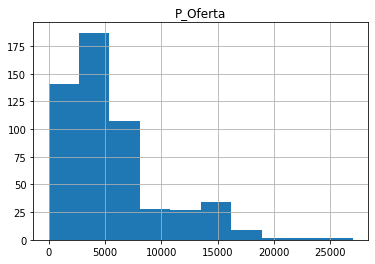

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np


# funcion que recibe el request URL en BS y regresa dataframe con los productos de la pagina
def GetProducts(bsURL):
    #se definen la listas en blanco
    name=[]
    priceroriginal=[]
    pricerpreciodescuento=[]

    # se busca resultado o lista de productos de la pagina y se guarda en variable
    products= bsURL.find_all('li', class_='results-item')    
    
 # Se recorre el objeto productos
    for product in products:
        #se obtiene el nombre del producto y se guarda en la lista
        name.append(product.find('a',class_='item__info-title').get_text().strip())
        # se checa si existe el precio original. si existe se guarda si no se inserta 0 (cero)
        if product.find('del'):
            priceroriginal.append(float(product.find('del').get_text().replace(',','').replace('$','').strip()))
        else:
            priceroriginal.append(0)
        #Se obtiene el precio de descuento
        if product.find('span',class_='price__fraction') != None:
            pricerpreciodescuento.append(float(product.find('span',class_='price__fraction').get_text().replace(',','').strip()))
        else:
            pricerpreciodescuento.append(0)
    # se guardan listas en un dataframe
    df = pd.DataFrame({'Producto':name,'P_Original':priceroriginal,'P_Oferta':pricerpreciodescuento})
    
    
    return df

##########################################################
# Comienza programa
##########################################################
# se hace el request de categoria de celulares
res = requests.get("https://celulares.mercadolibre.com.mx/")
URL = BeautifulSoup(res.text,"lxml")

#Se obtiene el listado de productos de la pagina principal
df_full=GetProducts(URL)

#Se obtienen los links de las paginas, se descarta el primer link que es # y se elimina el ultimo porque es link de 
#   la primera pagina
URLPages = [a['href'] for a in URL.find_all('a', class_='andes-pagination__link', href=True) if a['href'] != '#']
del URLPages[len(URLPages)-1]

#########################
#Se realiza el recorrido de las paginas
for page in URLPages:
    #se imprime URL procesada
    print(page)
    #se genera el request de la URL
    res = requests.get(page)
    URL = BeautifulSoup(res.text,"lxml")
    #se manda llama la funcion y regresa un dataframe de productos
    dfProductos=GetProducts(URL)
    #Se van concatendando los dataframe de cada pagina 
    df_full=df_full.append(dfProductos)
    
    

#Operacion de Precio en dolares y se salva en nueva columna    
df_full['P_dolares'] = [(pd.to_numeric(precio)/20) if precio != 0 else np.nan for precio in df_full['P_Oferta']]

#Resultado se exportan a un archivo CSV
df_full.to_csv (r'lista_celulares.csv', index = False, header=True) 

# Se imprime el numero de celulares
print(str(len(df_full))+' celulares recopilados')

#Se imprime histograma
df_full.hist(column='P_Oferta')
    

